# Regresion Logistica

In [1]:
%%writefile utils.py
import numpy as np
import matplotlib.pyplot as plt

def L(y, y_): return -(y * np.log(y_ + 1e-9)).sum()

def softmax(x):
    exp = np.exp(x)
    return  exp / exp.sum()

def example(x, y, w, b):
    fig, axes = plt.subplots(1, 7, figsize=(12,6), gridspec_kw={'width_ratios': [4]+[1]*6})
    ax_w, ax_x, ax_b, ax_y_, ax_sm, ax_y, ax_l = axes
    b = b[:,None]
    y = y[:,None]

    def mplot(x, ax, title):
        ax.matshow(x, cmap=plt.cm.Reds, alpha=0.5)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                ax.annotate(x[i,j], xy=(j,i), fontsize=15,
                            horizontalalignment='center',
                            verticalalignment='center')
        ax.set_title(title)
        ax.set_axis_off()

    mplot(w, ax_w, '$ W $')

    mplot(x, ax_x, '$ x $')

    mplot(b, ax_b, '$ b $')

    y_ = (w@x + b).round(2)
    mplot(y_, ax_y_, '$ Wx+b $')

    sm = softmax(y_).round(2)
    mplot(sm, ax_sm, '$ \hat{y} $ \n $ softmax(Wx+b) $')

    mplot(y, ax_y, '$ y $')

    loss = np.asarray([[L(y[:,0], sm[:,0])]]).round(2)
    mplot(loss, ax_l, '$ loss $')

    plt.tight_layout()
    plt.show()



Writing utils.py


In [2]:
import utils, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
%matplotlib inline

# Petalos de Iris: Load Data

In [ ]:
data = load_iris()
data.keys()

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
pd.DataFrame(data['data'], columns=data['feature_names']).head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
x = data['data']
print(x.shape)
x[:3]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [7]:
type(x)

numpy.ndarray

In [8]:
y = data['target']
print(y.shape)
y[:5]

(150,)


array([0, 0, 0, 0, 0])

In [9]:
set(y)

{0, 1, 2}

In [10]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [11]:
# Cambiamos la representacion de y a one-hot
y = np.eye(3)[y]
print(y.shape)
y

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [12]:
# Train validation split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [13]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
for i,e in enumerate(data['target_names']):
  print(i,e)

0 setosa
1 versicolor
2 virginica


In [15]:
# Armamos un diccionario para el target
idx2class = {i:e for i,e in enumerate(data['target_names'])}
idx2class

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [16]:
y_train[0]

array([1., 0., 0.])

In [17]:
eg_x = x_train[0]
eg_y = y_train[0]
eg_x, eg_y

(array([4.6, 3.6, 1. , 0.2]), array([1., 0., 0.]))

In [18]:
eg_x.shape

(4,)

In [19]:
x_train[0][:,None]

array([[4.6],
       [3.6],
       [1. ],
       [0.2]])

In [20]:
# Añadimos una dimension a eg_x
eg_x = x_train[0][:,None]
eg_x.shape

(4, 1)

In [21]:
eg_y.shape

(3,)

In [22]:
np.random.normal(size=12).reshape((3,4)).round(1)

array([[-0.3,  1.7,  0.8,  2.2],
       [ 0.8, -0.2,  1.4, -0.2],
       [-0.3, -0. , -0.8,  0.3]])

In [23]:
# definimos una matriz de pesos eg_w
np.random.seed(2)
eg_w = np.random.normal(size=4*3).reshape((3,4)).round(1)
print(f'shape: {eg_w.shape}')
eg_w

shape: (3, 4)


array([[-0.4, -0.1, -2.1,  1.6],
       [-1.8, -0.8,  0.5, -1.2],
       [-1.1, -0.9,  0.6,  2.3]])

In [24]:
eg_w.ravel()

array([-0.4, -0.1, -2.1,  1.6, -1.8, -0.8,  0.5, -1.2, -1.1, -0.9,  0.6,
        2.3])

In [25]:
# definimos una matriz de bias eg_b
np.random.seed(3)
eg_b = np.random.normal(size=3).round(1)
print(f'shape: {eg_b.shape}')
eg_b

shape: (3,)


array([1.8, 0.4, 0.1])

## Definimos el modelo

$ \hat{y} = f(x) = Wx + b $

In [26]:
def f(x): return (eg_w@x).ravel() + eg_b

eg_y_ = f(eg_x)
print(f'data: {eg_y}')
print(f'model: {eg_y_}')

data: [1. 0. 0.]
model: [ -2.18 -10.5   -7.14]


###  Softmax

$ softmax(\hat{y_i}) = \frac{e^{\hat{y_i}}}{\sum\limits_j e^{\hat{y_j}}} $

In [27]:
np.exp(eg_y_)

array([1.13041531e-01, 2.75364493e-05, 7.92752096e-04])

In [28]:
np.exp(eg_y_).sum()

0.1138618191862661

In [29]:
def softmax(x):
    exp = np.exp(x)
    return  exp / exp.sum()

softmax(eg_y_)

array([9.92795754e-01, 2.41840940e-04, 6.96240498e-03])

### Incluyendo la funcion de activacion

$ \hat{y} = f(x) =  softmax(Wx + b) $

In [30]:
def f(x): return softmax((eg_w@x).ravel() + eg_b)

eg_y_ = f(eg_x)
print(f'data: {eg_y}')
print(f'model: {eg_y_}')

data: [1. 0. 0.]
model: [9.92795754e-01 2.41840940e-04 6.96240498e-03]


In [31]:
np.argmax(eg_y_)

0

## Loss function: Cross entropy

$ L = - \frac{1}{m} \sum\limits_{i=1}^m p(x_i) \log{q(x_i)} $

* p(x): real values
* q(x): predicted values

$ \log{q(x_i)} = \log{\frac{e^{\hat{y_i}}}{\sum\limits_j e^{\hat{y_j}}}} $

In [32]:
np.log(eg_y_)

array([-7.23032181e-03, -8.32723032e+00, -4.96723032e+00])

In [33]:
def L(y, y_): return -(y * np.log(y_ + 1e-9)).sum()

eg_loss = L(eg_y, eg_y_)
eg_loss

0.007230320801531907

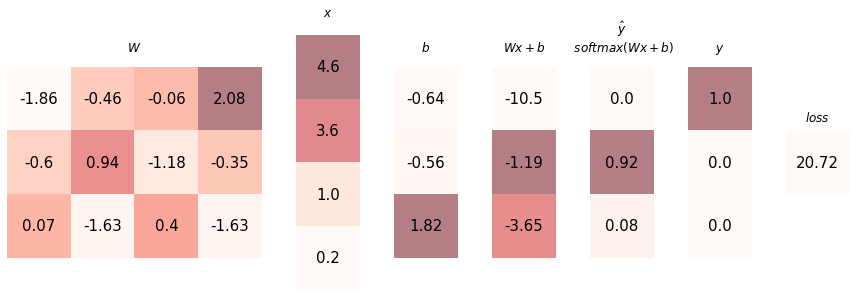

In [34]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w = np.random.normal(size=4*3).reshape((3,4)).round(2)
eg_b = np.random.normal(size=3).round(2)

utils.example(eg_x, eg_y, eg_w, eg_b)

# Tensorflow

Calcular automaticamente las gradientes de nuestras operaciones.

In [38]:
type(x_train)

numpy.ndarray

In [39]:
%tensorflow_version 2.x
import tensorflow as tf

# tf Graph Input
X = tf.cast(x_train[:5], dtype=tf.double)
Y = tf.cast(y_train[:5], dtype=tf.double)

# Set model weights
W = tf.random_normal_initializer()((4,3), dtype=tf.double)
b = tf.random_normal_initializer()((3,), dtype=tf.double)

with tf.GradientTape() as g:
    g.watch([W, b])
    y_ = tf.nn.softmax((X @ W) + b)
    loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(y_ + 1e-9), axis=1))

In [40]:
loss

<tf.Tensor: shape=(), dtype=float64, numpy=0.959230024061506>

In [41]:
loss.numpy()

0.959230024061506

In [42]:
W

<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
array([[ 0.01554093,  0.04515644,  0.02207593],
       [ 0.06541641, -0.03440198, -0.04375043],
       [-0.07584181,  0.02134968, -0.02960687],
       [ 0.07155314,  0.0505619 ,  0.00480047]])>

In [43]:
W.numpy()

array([[ 0.01554093,  0.04515644,  0.02207593],
       [ 0.06541641, -0.03440198, -0.04375043],
       [-0.07584181,  0.02134968, -0.02960687],
       [ 0.07155314,  0.0505619 ,  0.00480047]])

In [44]:
#Veamos las gradientes
W_gradients, b_gradients = g.gradient(loss, [W, b])

In [45]:
W_gradients.numpy()

array([[-2.02686771,  0.60133413,  1.42553358],
       [-1.63528023,  0.66921453,  0.9660657 ],
       [-0.40473834, -0.12416916,  0.5289075 ],
       [-0.03805443, -0.09023352,  0.12828794]])

In [46]:
b_gradients.numpy()

array([-0.43956198,  0.16625199,  0.27330999])

## Optimizacion: Mini-batch gradient descent

In [47]:
# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1
optimizer = tf.optimizers.SGD(learning_rate=lr)

nb = math.ceil(len(x_train) / bs)
nb # Número de batches por epoch

4

In [48]:
def softmax(X, W, b):
    return tf.nn.softmax((X @ W) + b)

In [49]:
def compute_loss(X, Y, W, b):
    y_ = softmax(X, W, b)
    return tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(y_ + 1e-9), axis=1))

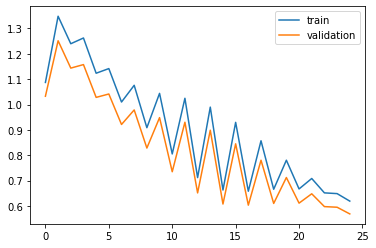

In [50]:
# Train loop
train_losses = []
val_losses = []

W = tf.Variable(tf.random_normal_initializer()((4,3), dtype=tf.double))
b = tf.Variable(tf.random_normal_initializer()((3,), dtype=tf.double))

for epoch in tqdm(range(epochs)):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = tf.cast(x_train[i*bs:(i+1)*bs], dtype = tf.double)
        batch_y = tf.cast(y_train[i*bs:(i+1)*bs], dtype = tf.double)
        batch_x = tf.stop_gradient(batch_x)
        batch_y = tf.stop_gradient(batch_y)
        with tf.GradientTape() as g:
            g.watch([W, b])
            loss = compute_loss(batch_x, batch_y, W, b)
            gradients = g.gradient(loss, [W, b])
            optimizer.apply_gradients(zip(gradients, [W, b]))


    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = compute_loss(x_train, y_train, W,b)
    train_losses.append(train_loss)

    val_loss = compute_loss(x_val, y_val, W,b)
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend()

## Resultado

In [51]:
pred, pred_loss = softmax(x_val, W, b), compute_loss(x_val, y_val, W,b)
pred_loss.numpy()

0.5687122532121687

In [52]:
y_val[0], pred.numpy()[0]

(array([0., 1., 0.]), array([0.0249857 , 0.14983737, 0.82517693]))

In [53]:
# Para obtener las predicciones finales vamos a usar np.argmax,
# que devuelve el indice con el mayor valor
np.argmax(y_val[0]), np.argmax(pred.numpy()[0])

(1, 2)

In [54]:
# Obtenemos todos los labels
real_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred.numpy(), axis=1)
real_labels[:], pred_labels[:]

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))

In [55]:
# Vamos a usar una metrica de accuracy para comparar los resultados
pred_acc = (real_labels == pred_labels).mean()
pred_acc

0.7

In [56]:
print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')

Loss = 0.57
Accuracy = 0.70


# Keras

Codigo equivalente usando keras.

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1

K.clear_session()

# Modelo
input_layer = Input(shape=(4,))
output = Dense(3, activation='softmax')(input_layer)
model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1

K.clear_session()

# Modelo
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/25
4/4 [==============================] - 0s 48ms/step - loss: 2.9865 - accuracy: 0.2583 - val_loss: 2.3942 - val_accuracy: 0.3000
Epoch 2/25
4/4 [==============================] - 0s 6ms/step - loss: 1.5186 - accuracy: 0.2750 - val_loss: 1.0290 - val_accuracy: 0.3667
Epoch 3/25
4/4 [==============================] - 0s 5ms/step - loss: 0.8941 - accuracy: 0.5833 - val_loss: 1.1487 - val_accuracy: 0.4000
Epoch 4/25
4/4 [==============================] - 0s 5ms/step - loss: 1.0643 - accuracy: 0.5833 - val_loss: 0.9276 - val_accuracy: 0.6333
Epoch 5/25
4/4 [==============================] - 0s 5ms/step - loss: 0.9487 - accuracy: 0.6333 - val_loss: 1.5675 - val_accuracy: 0.4333
Epoch 6/25
4/4 [==============================] - 0s 5ms/step - loss: 0.7654 - accuracy: 0.7250 - val_loss: 0.6015 - val_accuracy: 0.7000
Epoch 7/25
4/4 [==============================] - 0s 5ms/step - loss: 0.6621 - accuracy: 0.6917 - val_loss: 0.6028 - val_accuracy: 0.7000
Epoch 8/25
4/4 [=================

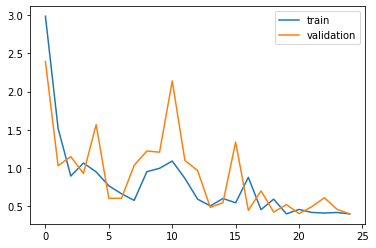

In [ ]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()

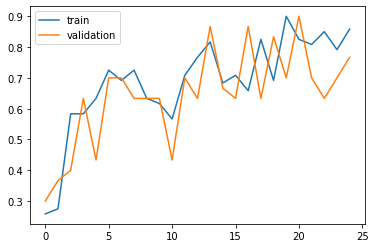

In [ ]:
plt.plot(log.history['accuracy'], label='train')
plt.plot(log.history['val_accuracy'], label='validation')
plt.legend()

## Resultados

In [ ]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

1/1 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.7667
Loss = 0.40
Accuracy = 0.77


# Redes Neuronales

In [ ]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w = np.random.normal(size=4*3).reshape((3,4))
eg_b = np.random.normal(size=3)

In [ ]:
eg_x.shape, eg_w.shape, eg_b.shape

((4, 1), (3, 4), (3,))

**Agregando una matriz intermedia incrementamos los parámetros de 12 a 70.**

In [ ]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w1 = np.random.normal(size=10*4).reshape((10,4))
eg_b1 = np.random.normal(size=10).reshape((10,1))
eg_w2 = np.random.normal(size=3*10).reshape((3,10))
eg_b2 = np.random.normal(size=3).reshape((3,1))

In [ ]:
temp = ((eg_w1 @ eg_x) + eg_b1)
temp.shape

(10, 1)

In [ ]:
y_ = ((eg_w2 @ temp) + eg_b2).ravel()
y_.shape

(3,)

## Tensorflow

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

def softmax(X, W1, b1, W2, b2):
    y_ = tf.nn.relu((X @ W1) + b1)
    y_ = tf.nn.softmax((y_ @ W2) + b2)
    return y_

In [ ]:
def compute_loss(Y, y_):   
    # Loss
    return tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(y_ + 1e-9), axis=1))

In [ ]:
# Params
bs = 32 # Batch size
epochs = 100
lr = 0.01
optimizer = tf.optimizers.SGD(learning_rate=lr)
nb = math.ceil(len(x_train) / bs)
nb # Numero de batches por epoch

4

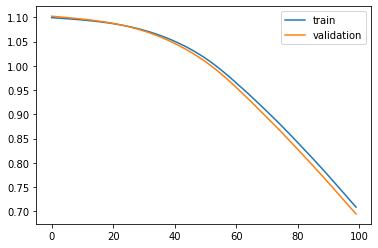

In [ ]:
# Train loop
train_losses = []
val_losses = []

W1 = tf.Variable(tf.random_normal_initializer()((4,10), dtype=tf.double))
b1 = tf.Variable(tf.random_normal_initializer()((10,), dtype=tf.double))
W2 = tf.Variable(tf.random_normal_initializer()((10,3), dtype=tf.double))
b2 = tf.Variable(tf.random_normal_initializer()((3,), dtype=tf.double))

for epoch in tqdm(range(epochs)):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = tf.cast(x_train[i*bs:(i+1)*bs], dtype=tf.double)
        batch_y = tf.cast(y_train[i*bs:(i+1)*bs], dtype=tf.double)
        batch_x = tf.stop_gradient(batch_x)
        batch_y = tf.stop_gradient(batch_y)
        with tf.GradientTape() as g:
            g.watch([W1, W2, b1, b2])
            loss = compute_loss(batch_y, softmax(batch_x, W1, b1, W2, b2))
            gradients = g.gradient(loss, [W1, W2, b1, b2])
            optimizer.apply_gradients(zip(gradients, [W1, W2, b1, b2]))
    
    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = compute_loss(y_train, softmax(x_train, W1, b1, W2, b2))
    train_losses.append(train_loss)
    
    val_loss = compute_loss(y_val, softmax(x_val, W1, b1, W2, b2))
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend()

In [ ]:
pred, pred_loss = softmax(x_val, W1, b1, W2, b2), compute_loss(y_val, softmax(x_val, W1, b1, W2, b2))
pred_loss.numpy()

real_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred, axis=1)

pred_acc = (real_labels == pred_labels).mean()

print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')

Loss = 0.69
Accuracy = 0.70


## Keras

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 100
lr = 0.01

# Modelo
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/100
4/4 [==============================] - 0s 36ms/step - loss: 1.5819 - accuracy: 0.3250 - val_loss: 1.1839 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2036 - accuracy: 0.3000 - val_loss: 1.1182 - val_accuracy: 0.3667
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1399 - accuracy: 0.3000 - val_loss: 1.0925 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1058 - accuracy: 0.3250 - val_loss: 1.0724 - val_accuracy: 0.4667
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0760 - accuracy: 0.3333 - val_loss: 1.0200 - val_accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0037 - accuracy: 0.3000 - val_loss: 0.9526 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9426 - accuracy: 0.5750 - val_loss: 0.8950 - val_accuracy: 0.8333
Epoch 8/100
4/4 [=========

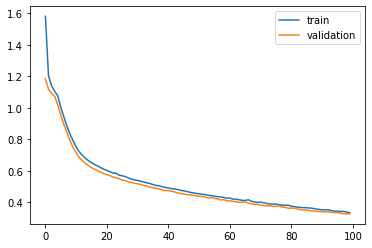

In [ ]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()

In [ ]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

1/1 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 1.0000
Loss = 0.33
Accuracy = 1.00


## Faulty Steel Plates

In [ ]:
data = pd.read_csv('faults.csv')
print(data.shape)
data.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
x = data.iloc[:, :-7]
y = data.iloc[:, -7:]

x.columns, y.columns

(Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
        'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
        'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
        'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
        'SigmoidOfAreas'],
       dtype='object'),
 Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
        'Other_Faults'],
       dtype='object'))

In [ ]:
# Armamos un diccionario para el target
idx2class = {i:e for i,e in enumerate(y.columns)}
idx2class

{0: 'Pastry',
 1: 'Z_Scratch',
 2: 'K_Scatch',
 3: 'Stains',
 4: 'Dirtiness',
 5: 'Bumps',
 6: 'Other_Faults'}

In [ ]:
y.values

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
# Train validation split
x_train, x_val, y_train, y_val = train_test_split(x, y.values, test_size=0.3, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1358, 27), (583, 27), (1358, 7), (583, 7))

In [ ]:
# preprocess
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
x_train[0]

array([-0.98092525, -0.84116281,  3.63697701,  3.6369304 ,  0.34403919,
        0.20960252,  0.03001974,  0.38907196, -0.45348069, -0.17247613,
       -0.69354383, -0.81249412,  0.81249412, -0.70407447, -0.75996547,
        0.32012064, -0.77876817,  1.10514645,  0.60609727, -1.40193739,
       -1.20118935,  1.39360954,  1.69611176,  0.66368059, -1.47692834,
       -0.15336504,  1.24210091])

In [ ]:
y_train[0], idx2class[np.argmax(y_train[0])]

(array([0, 0, 1, 0, 0, 0, 0]), 'K_Scatch')